In [348]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal

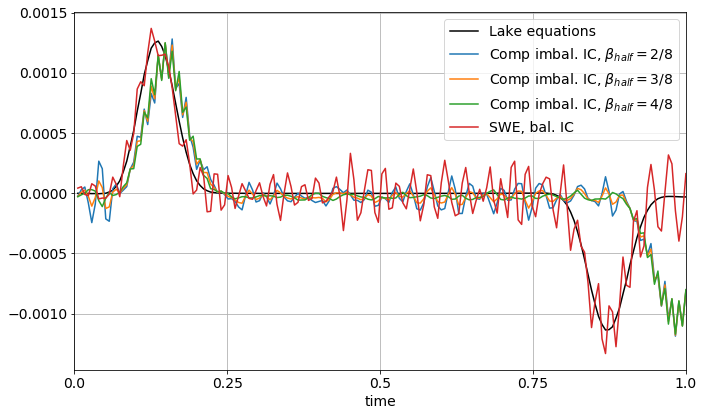

In [314]:
attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
attributes = ['p2_nodes']
# attributes = ['p2_half']

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"

base_fn = "output_swe_vortex"
directory = "output_swe_vortex"

py_directory = "../%s/" %directory

et = 1.0
swe = 'swe' in base_fn
if swe:
    Nx, Ny, Nz = 64, 1, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)
else:
    Nx, Ny = 64, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

p_ref = 8.61 * 1e4
p_ref = 1.0
times = np.arange(0,176)#[:50]
# times = np.arange(0.0,1.01,0.01)[1:][:20]
t_axs = np.linspace(0.0,1.0,5)
t_pos = np.linspace(0,175,5)
probe_loc = [32,32]
# l_typ = 'TIME'
l_typ = 'WINDOW_STEP'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(sfx , diff, attribute):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)
    if swe: ens = ens[:,:,0,:]
    probe = ens[:,probe_loc[0],probe_loc[1]] * p_ref
    
    probe -= probe.mean()
    label = sfx + '_' + attribute
    return label, probe

pls = []

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False

    sfx1 = 'psinc_noib'
#     sfx2 = 'comp_imbal_ib'
#     sfx2 = 'comp_debug_ib_8'
#     sfx2 = 'comp_imbal_half_ib-6'
#     sfx2a = 'comp_imbal_half_ib-4'
#     sfx2b = 'comp_imbal_half_ib-6'
#     sfx2c = 'comp_imbal_half_ib-8'
    sfx2a = 'comp_imbal_full_ib-8'
    sfx2b = 'comp_imbal_full_ib-10'
    sfx2c = 'comp_imbal_full_ib-12'
    sfx3 = 'comp_bal_noib'
#     sfx3 = 'comp_imbal_full_ib-10'
#     sfx3 = 'comp_debug_ib'

    l1, p1 = get_ens(sfx1, diff, attribute)
    l2a, p2a = get_ens(sfx2a, diff, attribute)
    l2b, p2b = get_ens(sfx2b, diff, attribute)
    l2c, p2c = get_ens(sfx2c, diff, attribute)
    attribute = 'p2_nodes'
    l3, p3 = get_ens(sfx3, diff, attribute)

    fs = (8,4) # fs used in write-up for first pub
    fs = (10,6)
    pl = pt.plotter_1d(figsize=fs,fontsize=14,ncols=1,nrows=1)
    ax = pl.get_ax(i)

    if diff == True: times = times[1:]

    ins = p1
    beta = 5.0/8
    rolled = np.roll(ins,-1)
    rolled = (beta * ins + (1.0-beta) * rolled)
    rsfx = 'rolled by %.3f' %beta
    
    ref = 'Lake' if swe else 'Psinc'
    full = 'SWE' if swe else 'Comp'
    ic = 'imbal.' if 'imbal' in sfx3 else 'bal.'
    l1 = '%s equations' %ref
#     l2 = '%s, imbal. IC with blending' %full
    l2a = r'Comp imbal. IC, $\beta_{half}=2/8$'
    l2b = r'Comp imbal. IC, $\beta_{half}=3/8$'
    l2c = r'Comp imbal. IC, $\beta_{half}=4/8$'
    l3 = '%s, %s IC' %(full, ic)
    
    ax.plot(times, p1, 'k', label=l1)
    ax.plot(times, p2a, label=l2a)
    ax.plot(times, p2b, label=l2b)
    ax.plot(times, p2c, label=l2c)
    ax.plot(times, p3, label=l3)
#     ax.plot(times, rolled, '--',label=rsfx)

    if swe:
        tcl = 'SWE vortex'
        qty = '$\delta h$'
    else:
        tcl = 'Euler vortex'
        qty = '$\delta \pi$'

#     ax.set_title("%s: probe measurement of %s at [%i,%i]" %(tcl, qty, probe_loc[0]-32,probe_loc[1]-32))
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time')
    ax.set_xticks(t_pos)
    ax.set_xticklabels(t_axs)
    ax.grid()
    ax.legend()
#     ax.set_xlim([176*0.10,176*0.40])
#     ax.set_ylim([-0.0001,0.0005])
    
    pl.img.tight_layout()
    
    fn = 'swe' if swe else 'euler'
#     pl.save_fig('%s_w_%s' %(fn, ic))
    pl.save_fig('euler_half_comparisons')
    
    prt.prtt('plt')

In [ ]:
pdfjam --nup 2x1 swe_w_bal.pdf euler_w_bal.pdf --outfile comparisons_w_bal.pdf
pdfcrop comparisons_w_imbal.pdf

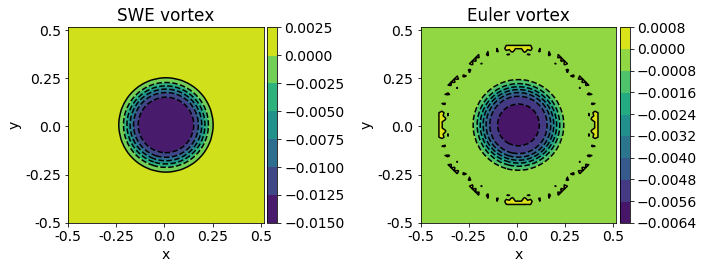

In [17]:
attribute = 'p2_nodes'
et = 1.0

base_fn = "output_swe_vortex"
directory = "output_swe_vortex"
py_directory = "../%s/" %directory

Nx, Ny, Nz = 64, 1, 64
swe_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx, Ny = 64, 64
euler_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

# times = np.arange(0,176)#[:50]
times = [0]
l_typ = 'WINDOW_STEP'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=True):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag='ic')[0]
    if swe: ens = ens[:,0,:]

    label = sfx + '_' + attribute
    return label, ens

diff = False
sfx1 = 'comp_bal_noib'
l1, a1 = get_ens(swe_tc, sfx1, diff, attribute)
l2, a2 = get_ens(euler_tc, sfx1, diff, attribute, swe=False)


pl_lst = [[a1, 'SWE vortex'],
          [a2, 'Euler vortex']]

pl = pt.plotter(pl_lst,ncols=2,figsize=(10,5),sharey=False)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Nz-1,5)
x_label = r'x'
y_label = r'y'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='contour')
pl.save_fig('initial_vortices')




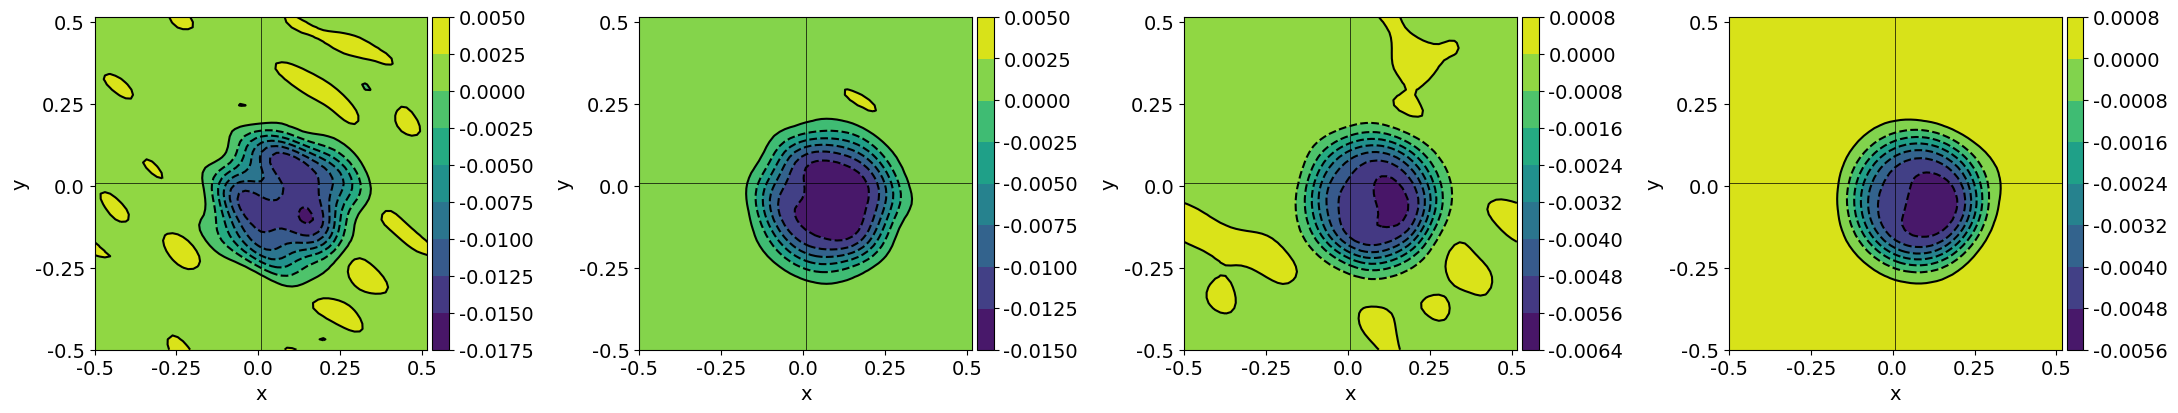

In [99]:
attribute = 'p2_nodes'
et = 1.0

base_fn = "output_swe_vortex"
directory = "output_swe_vortex"
py_directory = "../%s/" %directory

Nx, Ny, Nz = 64, 1, 64
swe_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx, Ny = 64, 64
euler_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

# times = np.arange(0,176)#[:50]
times = np.arange(0.0,3.0,0.01)[1:]
times = [3.0]
# l_typ = 'WINDOW_STEP'
l_typ = 'TIME'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=True, tag=None):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)[0]
    if swe: ens = ens[:,0,:].T
    if not swe: ens = ens.T

    label = sfx + '_' + attribute
    return label, ens

diff = False
sfx1 = 'comp_1.0_pp_tra_truth'
l1, a1 = get_ens(swe_tc, sfx1, diff, attribute)
# times = [0.01]
sfx1 = 'comp_1.0_pp_tra_truth_ib'
l2, a2 = get_ens(swe_tc, sfx1, diff, attribute)

sfx1 = 'comp_1.0_pp_tra_truth'
l3, a3 = get_ens(euler_tc, sfx1, diff, attribute, swe=False)
# times = [0.01]
sfx1 = 'comp_1.0_pp_tra_truth_ib'
l4, a4 = get_ens(euler_tc, sfx1, diff, attribute, swe=False)


pl_lst = [[a1, ''],
          [a2, ''],
          [a3, ''],
          [a4, '']]

pl = pt.plotter(pl_lst,ncols=4,figsize=(22,9),sharey=False)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Nz-1,5)
x_label = r'x'
y_label = r'y'
axhline = 32
axvline = 32

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label, axhline=axhline, axvline=axvline)
_ = pl.plot(aspect='equal',method='contour')
pl.save_fig('obs_truth')

In [123]:
Nx, Ny, Nz = 64, 1, 64
et = 3.0
# et = 0.5

def load(Nx,Ny,Nz,et):
    base_fn = 'output_swe_vortex'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,Nz,et)


Nx, Ny = 64, 64
et = 3.0

def load(Nx,Ny,et):
    base_fn = 'output_travelling_vortex'
    pydir = '../%s/' %base_fn

#     tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    return tc, tags
tc, tags = load(Nx,Ny,et)

0.009240594 -0.009059209 0.018299803
0.0015149171 -0.0062146923 0.0077296095
0.0026199657
0.0014708822


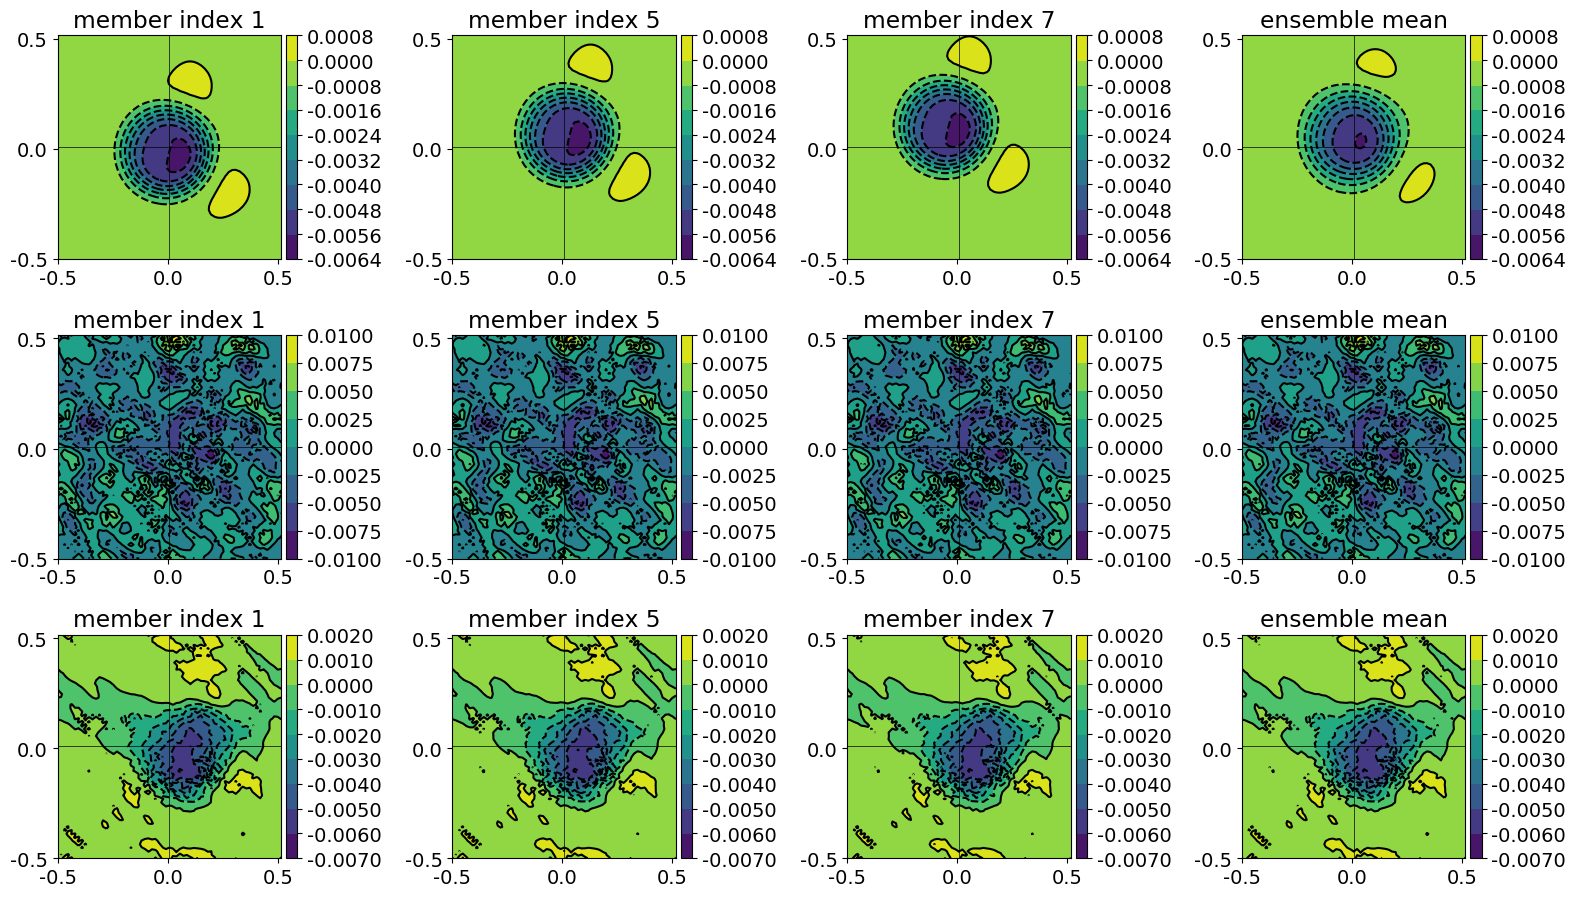

In [147]:
import random

random.seed(444)

N = 10
sfx0 = 'wdawloc_pp_rhou_rhow_tra_0.25_ib_nonorm'
sfx0 = 'wdawloc_pp_all_tra_0.25_nonorm'
sfx1 = tc.cb_suffix(1,0, '%s' %(sfx0))
sfx_ref = 'noda_pp'
# attribute = 'rhow'
attributes = ['rho','rhow']
attributes = ['p2_nodes']
attribute = attributes[0]

swe = False

times = [0.0]
tag = 'ic'

times = [3.0]
tag = tags[9]

class oo(object): pass
ens0_oo = oo()
ens1_oo = oo()
ens_ref_oo = oo()

if len(attributes) > 1:
    for attribute in attributes:
        ens0 = tc.get_ensemble(times, N, attribute, sfx0, tag=tag, inner=True)
        ens1 = tc.get_ensemble(times, N, attribute, sfx1, tag=tag, inner=True)
        ens_ref = tc.get_ensemble(times, N, attribute, sfx_ref, tag=tag, inner=True)
        setattr(ens0_oo,attribute,ens0)
        setattr(ens1_oo,attribute,ens1)
        setattr(ens_ref_oo,attribute,ens_ref)

    ens0 = getattr(ens0_oo,attributes[1]) / getattr(ens0_oo,attributes[0])
    ens1 = getattr(ens1_oo,attributes[1]) / getattr(ens1_oo,attributes[0])
    ens_ref = getattr(ens_ref_oo,attributes[1]) / getattr(ens_ref_oo,attributes[0])
else:
    ens0 = tc.get_ensemble(times, N, attributes[0], sfx0, tag=tag, inner=True)
    ens1 = tc.get_ensemble(times, N, attributes[0], sfx1, tag=tag, inner=True)
    ens_ref = tc.get_ensemble(times, N, attributes[0], sfx_ref, tag=tag, inner=True)

enses = [ens_ref, ens0, ens1]
sfxes = [sfx_ref, sfx0, sfx1]

diff = False
exp = 1

if swe:
    mean0 = np.mean(ens0[0],axis=0)[:,0,:]
    mean1 = np.mean(ens1[0],axis=0)[:,0,:]
    mean_ref = np.mean(ens_ref[0],axis=0)[:,0,:]
else:
    mean0 = np.mean(ens0[0],axis=0)
    mean1 = np.mean(ens1[0],axis=0)
    mean_ref = np.mean(ens_ref[0],axis=0)
# mean_ref = [mean_ref.T, 'ensemble_mean']
if diff == True:
    mean0 -= mean_ref
    mean1 -= mean_ref
print(mean0.max(), mean0.min(), mean0.max() - mean0.min())
print(mean1.max(), mean1.min(), mean1.max() - mean1.min())
print(np.sqrt((mean0**2).mean()))
print(np.sqrt((mean1**2).mean()))
mean0c = np.copy(mean0)
mean1c = np.copy(mean1)
mean0 = [mean0.T**exp,'ensemble mean']
mean1 = [mean1.T**exp,'ensemble mean']
mean_ref = [mean_ref.T**exp,'ensemble mean']
means = [mean_ref, mean0, mean1]

attr_labels = pt.labels()

arr_lst = []
for bb,ens in enumerate(enses):
    sfx = sfxes[bb]
    for aa, ens_at in enumerate(ens):
        fs = (14,8)
        fs = (22,9)
        
        ens_arr = []
        for n, arr in enumerate(ens_at):
            arr_ref = ens_ref[aa][n]
            if swe:
                arr_ref = arr_ref[:,0,:].T
                arr = arr[:,0,:].T
            else:
                arr_ref = arr_ref.T
                arr = arr.T

            if diff == True:
                arr -= arr_ref

            ens_arr.append([arr, 'member index %i' %n])
    #     arr_lst = [[arr[:,0,:].T,'member index %i' %n] for n,arr in enumerate(ens_at)]
        k = 3
        if k > N: k = 3
        arr_lst += [ens_arr[1],ens_arr[5],ens_arr[7]]
#         arr_lst = random.sample(arr_lst, k=k)
        arr_lst.append(means[bb])
        nn = 1 if N == 2 else 2
        nn = 1
        ncolslen = int(len(arr_lst)/nn)

ncolslen = 4
fs = (16,10)
pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)

x_axs = [-0.5,0.0,0.5]
y_axs = [-0.5,0.0,0.5]
x_loc = np.linspace(0,Nx-1,3)
y_loc = np.linspace(0,Nz-1,3)

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, axhline = 32, axvline = 32)

#         st = "Quantity is %s at time %.2f.\n%s" %(attr_labels[attribute], times[0], sfx)
_ = pl.plot(aspect='equal',method='contour')
pl.save_fig('euler_enses_3.0')

In [48]:
a = 0.000154
print("%.2e" %a)

1.54e-04


(300, 64, 64)
(300, 65, 65)
(300, 64, 64)
(300, 64, 64)


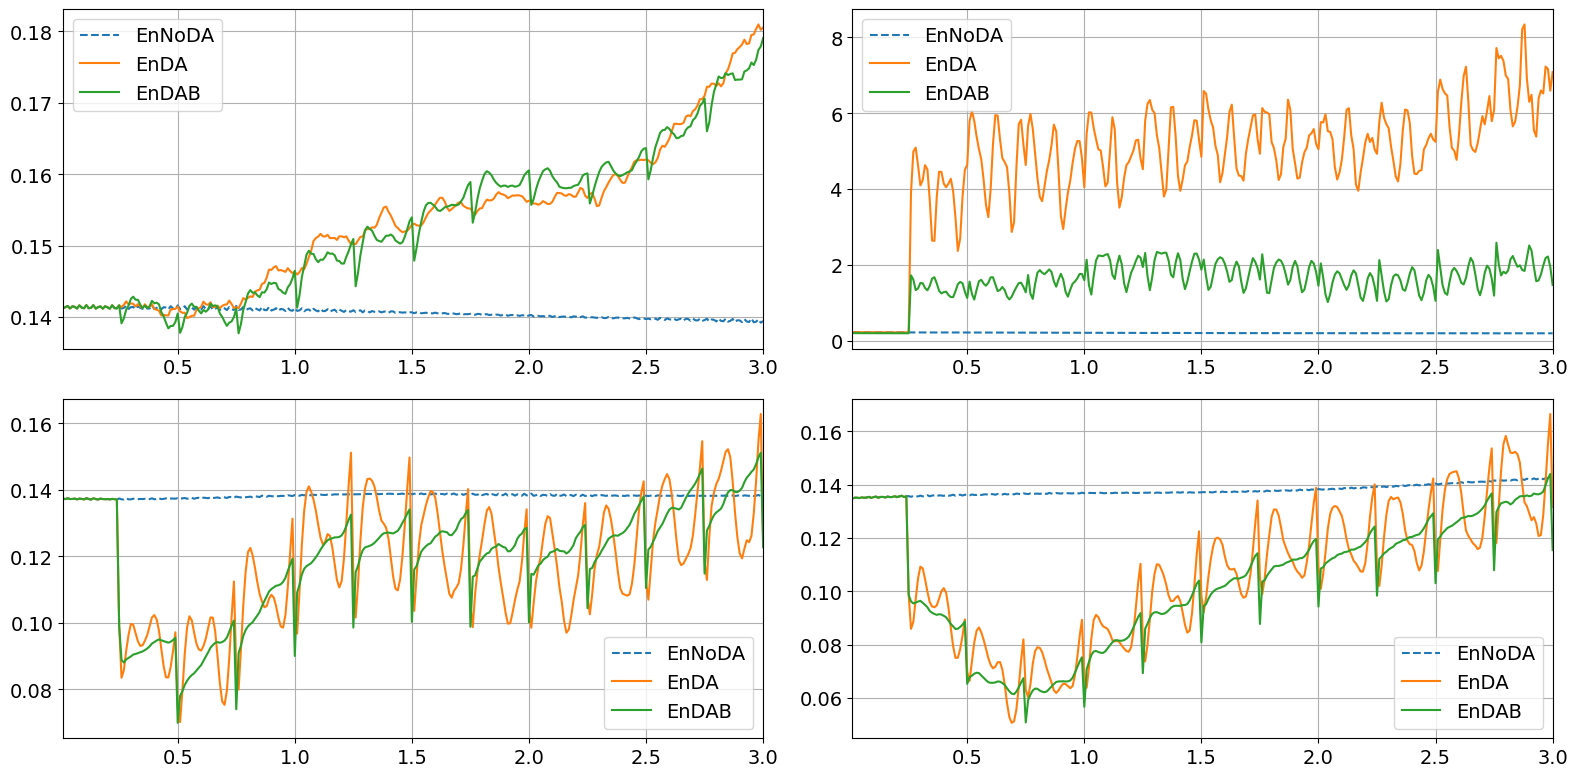

In [145]:
import matplotlib.pyplot as plt

attributes = ['rho','p2_nodes','rhou','rhov']

base_fn = "output_swe_vortex"
directory = "output_swe_vortex"
py_directory = "../%s/" %directory

Nx, Ny, Nz = 64, 1, 64
swe_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx, Ny = 64, 64
euler_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

py_directory = "../%s/" %directory

plt.style.use('default')

et = 3.0
N = 10
times = np.arange(0.0,3.01,0.01)[1:]

probe_idx = [32,32]

fn = 'effects_obs_covar_ensemble_spread'
title = ''

pl = pt.plotter_1d(figsize=(16,8),fontsize=14,ncols=2)
tc = euler_tc
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels()
attr_shorts = pt.short_labels()

rmse_type = 'probe'
rmse_type = 'spatial'
# rmse_type = 'mean'

def get_ens(sfx,diff):
    return tc.get_ensemble(times, N, attribute, sfx, label_type='TIME', avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = False if attribute == 'p2_nodes' else False
    gt = 'n' if attribute == 'p2_nodes' else 'c'
    
    ens_noda_suffix = 'noda_pp'
    ens_noda_label = 'EnNoDA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'wdawloc_pp_rhou_rhow_tra_ib_0.25_nonorm'
    ens_1_suffix = 'wdawloc_pp_rhou_rhov_tra_0.25_nonorm'
#     ens_1_suffix = 'wdawloc_pp_all_tra_0.25_nonorm'
    ens_1_label = r'EnDA'
    
#     ens_2_suffix = 'wdawloc_pps_rhou_rhow_tra_nonorm'
    ens_2_suffix = tc.cb_suffix(1,0, '%s' %(ens_1_suffix))
    ens_2_label = r'EnDAB'

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    print(ens_2.shape)
    
    obs = tc.get_ensemble(times, 1, attribute, 'comp_1.0_pp_tra_truth', label_type='TIME',avg=True, diff=diff)
    truth = tc.get_ensemble(times, 1, attribute, 'comp_1.0_pp_tra_truth_ib', label_type='TIME',avg=True, diff=diff)
#     others = tc.get_ensemble(times, 1, attribute, 'comp_debug_ib', label_type='TIME',avg=True, diff=diff)
#     others = others[:,probe_loc[0],probe_loc[1]]

    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, truth, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, truth, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, truth, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,truth,avg=avg,grid_type=gt)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,truth,avg=avg,grid_type=gt)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,truth,avg=avg,grid_type=gt)
#         ax.set_ylabel('spatial and ensemble averaged RMSE')
#         plt.suptitle("Assimilated quantities are %s and %s." %(attr_labels['rhou'], attr_labels['rhow']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    elif rmse_type == 'mean':
        diff_noda = tc.get_mean(ens_noda,gt)
        diff_ens_1 = tc.get_mean(ens_1,gt)
        diff_ens_2 = tc.get_mean(ens_2,gt)
        ref_mean = tc.get_mean(truth,gt)
        obs_mean = tc.get_mean(obs,gt)
        ax.set_ylabel('mean')
        plt.suptitle("Assimilated quantities are %s and %s." %(attr_labels['rhou'], attr_labels['rhow']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends."oiiiiii9mjknn %(title))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_noda, '--', label=ens_noda_label)
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
#     ax.plot(times,others)
#     if rmse_type == 'mean':
#         ax.plot(times,ref_mean, label='ref_mean')
#         ax.plot(times,obs_mean, label='obs_mean')
#     ax.axvline(0.06, c='k')

#     ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
#     ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
#     pl.fig.text(0.5, 0.04, 'common xlabel', ha='center', va='center')
#     pl.fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')
#     pl.ax.set_xlabel('common xlabel')
#     pl.ax.set_ylabel('common ylabel')

#     plt.tight_layout(rect=[-0.0, -0.0, 1.0, 1.0])
    
    prt.prtt('plt')

plt.tight_layout()
plt.savefig('euler_rmse_momenta.pdf')
plt.show()

# Investigating the blending time-shift

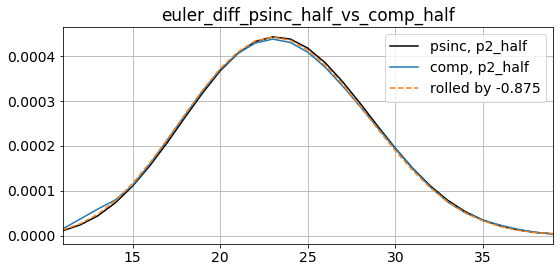

In [267]:
attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
attributes = ['p2_nodes']
attributes = ['p2_half']

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"

# base_fn = "output_swe_vortex"
# directory = "output_swe_vortex"

py_directory = "../%s/" %directory

et = 1.0
swe = 'swe' in base_fn
if swe:
    Nx, Ny, Nz = 64, 1, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)
else:
    Nx, Ny = 64, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

p_ref = 8.61 * 1e4
p_ref = 1.0
times = np.arange(0,176)[10:40]#[145:155]#[25:35]#[20:30]
# times = np.arange(0.0,1.01,0.01)[1:][:20]
t_axs = np.linspace(0.0,1.0,5)
t_pos = np.linspace(0,175,5)
probe_loc = [32,32]
# l_typ = 'TIME'
l_typ = 'WINDOW_STEP'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(sfx , diff, attribute):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)
    if swe: ens = ens[:,:,0,:]
    probe = ens[:,probe_loc[0],probe_loc[1]] * p_ref
    
#     probe -= probe.mean()
    label = sfx + '_' + attribute
    return label, probe

pls = []

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' or attribute == 'p2_half' else False

    sfx1 = 'psinc_noib'
#     sfx1 = 'comp_bal_noib'

    attribute1 = 'p2_nodes'
    attribute1 = 'p2_half'
    l1_attr = np.copy(attribute1)

    l1, p1 = get_ens(sfx1, diff, attribute1)
#     l2, p2 = get_ens(sfx2, diff, attribute)
    sfx3 = 'comp_bal_noib'
#     sfx3 = 'psinc_noib'
    attribute3 = 'p2_nodes'
    attribute3 = 'p2_half'
    l3, p3 = get_ens(sfx3, diff, attribute3)


    pl = pt.plotter_1d(figsize=(8,4),fontsize=14,ncols=1,nrows=1)
    ax = pl.get_ax(i)

    if diff == True: times = times[1:]
    
    ref = 'Lake' if swe else 'psinc'
    full = 'SWE' if swe else 'comp'
    ic = 'imbal.' if 'imbal' in sfx3 else 'bal.'
    
    if 'nodes' in attribute1:
        l1_attr = 'p2_full'
    else:
        l1_attr = attribute1

    if 'nodes' in attribute3:
        l3_attr = 'p2_full'
    else:
        l3_attr = attribute3
    
    if 'comp' in l1:
        l1 = '%s, %s' %(full, l1_attr)
        l1c = full
    else:
        l1 = '%s, %s' %(ref, l1_attr)
        l1c = ref
        
    if 'comp' in l3:
        l3 = '%s, %s' %(full, l3_attr)
        l3c = full
    else:
        l3 = '%s, %s' %(ref, l3_attr)
        l3c = ref
        
    if l1c is not l3c:
        p1 -= p1.mean()
        p1 += p3.mean()
        
    ins = p1
    beta = 7.0/8
    shift = -1
    rolled = np.roll(ins,shift)
    rolled = (beta * ins + (1.0-beta) * rolled)
    beta = np.sign(shift) * beta
    rsfx = 'rolled by %.3f' %beta

    l1t = str(l1_attr)[3:]
    l3t = str(l3_attr)[3:]
#     
    l2 = '%s, imbal. IC w/ blending w/ time-shift' %full
#     l3 = '%s %s, %s' %(full, ic, attribute)
#     l3 = '%s %s' %(ref, attribute)
    
    ax.plot(times, p1, 'k', label=l1)
#     ax.plot(times, p2, label=l2)
    ax.plot(times, p3, label=l3)
    ax.plot(times, rolled, '--',label=rsfx)
# 
    if swe:
        tcl = 'SWE vortex'
        qty = '$\delta h$'
    else:
        tcl = 'Euler vortex'
        qty = '$\delta \pi$'

    fn = 'euler_diff_%s_%s_vs_%s_%s' %(l1c, l1t, l3c, l3t)
#     fn = 'comp_half_vs_comp_full'
    ax.set_title("%s" %(fn))
    ax.set_xlim([times[0],times[-1]])
#     ax.set_xlabel(r'time')
#     ax.set_xticks(t_pos)
#     ax.set_xticklabels(t_axs)
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
#     fn = 'swe' if swe else 'euler'
#     pl.save_fig('%s' %fn)
    
    prt.prtt('plt')

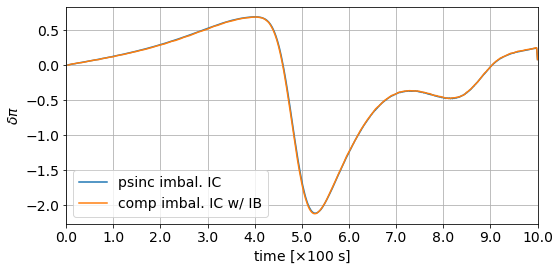

In [562]:
attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
attributes = ['p2_nodes']
# attributes = ['p2_half']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"

py_directory = "../%s/" %directory

et = 10.0
Nx, Ny = 160, 80
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

p_ref = 8.61 * 1e4
u_ref = 100.0
R_gas = 287.4
T_ref = 300.0
Msq = u_ref * u_ref / (R_gas * T_ref)
# p_ref = 1.0
times = np.arange(0,527)[1:]#[:186]
# # times = np.arange(0.0,1.01,0.01)[1:][:20]
t_axs = np.linspace(0.0,10,11)
t_pos = np.linspace(0,times[-1],11)
probe_loc = [80,40]
# l_typ = 'TIME'
l_typ = 'WINDOW_STEP'

rhoY = False
CFL = False

prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(sfx , diff, attribute):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=False)
    
    probe = ens[:,probe_loc[0],probe_loc[1]]

#     probe *= p_ref
#     probe *= Msq
    
#     p_min = probe.min()
#     probe += 1.0
#     probe -= p_min
#     exp = 1.4 / 0.4
#     probe = probe**exp
    probe *= p_ref
#     probe -= (abs(p_min)**exp)
#     probe *= p_ref
    probe = probe[1:] - probe[:-1]
    
    
#     probe -= probe.mean()
    label = sfx + '_' + attribute
    return label, probe

pls = []

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' or attribute == 'p2_half' else False

    sfx1 = 'debug_rkadv_psinc_noib'
    if CFL : sfx1 = 'debug_rkadv_psinc_noib_CFL'
    attribute1 = 'p2_nodes'
    if rhoY : attribute1 = 'rhoY'
#     l1_attr = np.copy(attribute1)
    l1, p1 = get_ens(sfx1, diff, attribute1)
    l1 = 'psinc imbal. IC'
    
    sfx2 = 'debug_rkadv_comp_noib'
    if CFL : sfx2 = 'debug_rkadv_comp_noib_CFL'
    attribute2 = 'p2_nodes'
    if rhoY : attribute2 = 'rhoY'
    l2_attr = np.copy(attribute2)
    l2, p2 = get_ens(sfx2, diff, attribute2)
    l2 = 'comp imbal. IC'
    
    sfx3 = 'debug_rkadv_comp_ib-16'
    if CFL : sfx3 = 'debug_rkadv_comp_CFL_ib-16'
    attribute3 = 'p2_nodes'
    if rhoY : attribute3 = 'rhoY'
    l3, p3 = get_ens(sfx3, diff, attribute3)
    l3 = 'comp imbal. IC w/ IB'

    pl = pt.plotter_1d(figsize=(8,4),fontsize=14,ncols=1,nrows=1)
    ax = pl.get_ax(i)
    if diff == True:
        times = times[1:]
    
    ax.plot(times, p1, label=l1)
#     ax.plot(times, p2, label=l2)
    ax.plot(times, p3, label=l3)
#     ax.plot(times, rolled, '--',label=rsfx)

#     fn = 'euler_diff_%s_%s_vs_%s_%s' %(l1c, l1t, l3c, l3t)
#     fn = 'comp_half_vs_comp_full'
    fn = 'rb_psinc_ib_wo_comp_80_40'
#     ax.set_title('')
    ax.set_xlim([times[0],times[-1]])
    ax.set_ylabel(r'$\delta \pi$')
    ax.set_xlabel(r'time [$\times 100$ s]')
    ax.set_xticks(t_pos)
    ax.set_xticklabels(t_axs)
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
#     fn = 'swe' if swe else 'euler'
    pl.save_fig('%s' %fn)
    
    prt.prtt('plt')

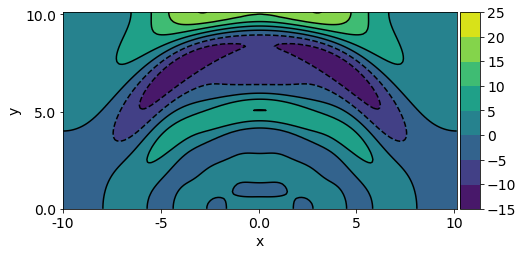

In [545]:
attribute = 'p2_nodes'
et = 10.0

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

Nx, Ny = 160, 80
euler_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
tags = euler_tc.get_tag_dict()

p_ref = 8.61 * 10**4
# p_ref = 1.0

# times = np.arange(0,176)#[:50]
times = [14,15]
# times = [526]
l_typ = 'WINDOW_STEP'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=False):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tags[9])[0]
    ens = ens.T * p_ref

    label = sfx + '_' + attribute
    return label, ens

diff = True
sfx1 = 'debug_rkadv_comp'
attribute = 'rhoY'
l1, a1 = get_ens(euler_tc, sfx1, diff, attribute)
attribute = 'p2_nodes'
l2, a2 = get_ens(euler_tc, sfx1, diff, attribute)


# pl_lst = [[a1/a2 * 300.0, '']]
pl_lst = [[a2, '']]

pl = pt.plotter(pl_lst,ncols=2,figsize=(8,4),sharey=False)
x_axs = [-10,-5,0.0,5,10]
y_axs = [0.0,5.0,10.0]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Ny-1,3)
x_label = r'x'
y_label = r'y'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='contour')
pl.save_fig('rb_deltap_contour')

In [344]:
print(8.61*1e4)
print(8.61*10**4)

86100.0
86100.0
